## SVM Checker

In [48]:
%matplotlib inline

import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import itertools




def example(num_samples=10, num_features=2, grid_size=20, kernelType = 'linear'):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = {
        'linear': svm.SVMTrainer(svm.Kernel.linear()),
        'gaussian': svm.SVMTrainer(svm.Kernel.gaussian(1.0)),
        'polynomial': svm.SVMTrainer(svm.Kernel.polynomial(1.0))
    }[kernelType]
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))
    Z = np.array(result).reshape(xx.shape)
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[ 0.4765155   0.99397748]
 [-0.48790616  0.64453052]
 [-1.30571074 -1.81831638]
 [-0.37825763  0.1938698 ]
 [ 1.195369    0.93273898]
 [-0.1339543   1.3145049 ]
 [-0.70569293 -1.17417091]
 [ 0.51659644 -0.32933007]
 [-0.41721731 -0.48851354]
 [-0.16102439  0.1171977 ]]
     pcost       dcost       gap    pres   dres
 0: -4.5425e+00 -9.8619e+00  3e+01  4e+00  2e+00
 1: -1.4883e+01 -1.7731e+01  1e+01  2e+00  1e+00
 2: -7.4473e+01 -7.4946e+01  2e+01  2e+00  9e-01
 3: -8.3382e+01 -9.3249e+01  3e+01  1e+00  6e-01
 4: -8.8110e+01 -9.9583e+01  2e+01  4e-01  2e-01
 5: -8.7657e+01 -8.8093e+01  8e-01  1e-02  5e-03
 6: -8.7626e+01 -8.7630e+01  8e-03  1e-04  5e-05
 7: -8.7625e+01 -8.7625e+01  8e-05  1e-06  5e-07
 8: -8.7625e+01 -8.7625e+01  8e-07  1e-08  5e-09
Optimal solution found.


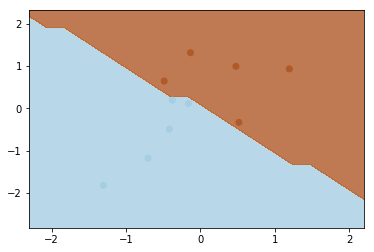

In [49]:
example()